## Imbalanced Data Problem
Imbalanced data is a common problem in machine learning. It occurs when the number of observations in each class is not the same. This can be a problem because most machine learning algorithms are designed to maximize overall accuracy and can result in models that have poor predictive performance, even on the majority class. In this notebook, we will explore how to handle imbalanced data using the healthcare stroke dataset.

### Dataset
The dataset contains 5110 observations and 12 features. The “stroke” column is the target variable. The dataset is imbalanced, where the majority class (no stroke) accounts for 95.13% of the observations and the minority class (stroke) accounts for 4.87% of the observations.

### Objective
The objective of this notebook is to build a machine learning model to predict whether a patient will have a stroke or not. The specific focus of this notebook is to handle the imbalanced data problem.

### Approach
We will use the following approach to handle the imbalanced data problem:
1.    Load and visualize the dataset
2.    Verify the imbalance in the dataset
3.    Use techniques to handle the imbalance in the dataset (SMOTE, and undersampling)
4.    Build multiple machine learning models using GridSearchCV to find the best hyperparameters
5.    Evaluate the performance of the models using the test set
6.    Compare the performance of the models and data Preprocessing techniques

In [29]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
#import data from local directory
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

#### Data Exploration and Visualization

In [31]:
# Display data information
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [32]:
# Display first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())
# Drop null values
df.dropna(inplace = True)

First 5 rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


Class Count:
0    4700
1     209
Name: stroke, dtype: int64


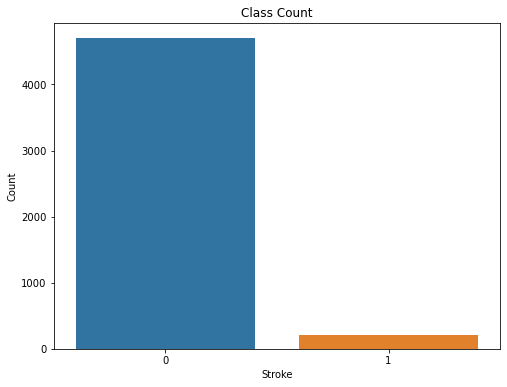


Imbalanced Data Ratio (Non-Stroke:Stroke): 22.49


In [33]:
# Check for class count
class_count = df['stroke'].value_counts()
print("Class Count:")
print(class_count)

# Visualize class count
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title("Class Count")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.show()

# Check for imbalanced data
imbalanced = class_count[0] / class_count[1]
print("\nImbalanced Data Ratio (Non-Stroke:Stroke): {:.2f}".format(imbalanced))

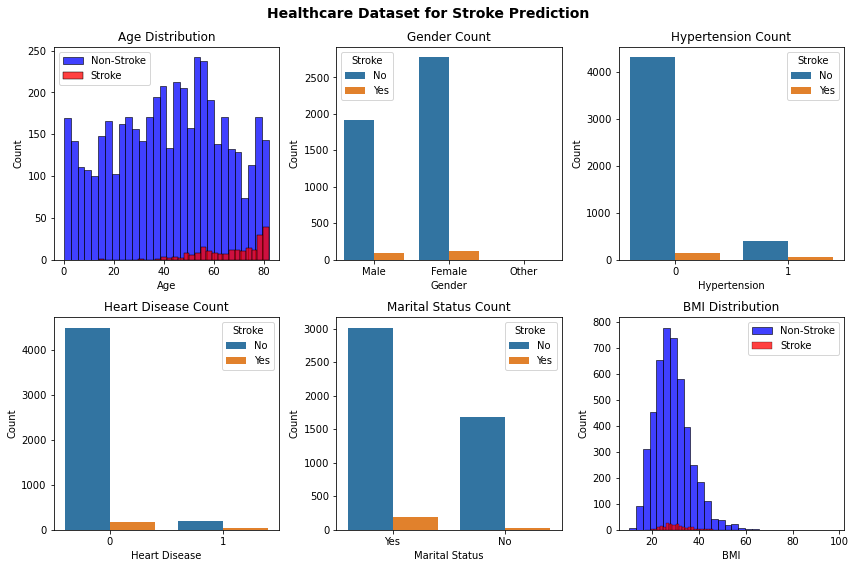

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Healthcare Dataset for Stroke Prediction', fontsize=14, fontweight='bold')

# Age Distribution Plot
sns.histplot(df[df['stroke'] == 0]['age'], bins=30, color='blue', label='Non-Stroke', ax=axes[0, 0])
sns.histplot(df[df['stroke'] == 1]['age'], bins=30, color='red', label='Stroke', ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend()

# Gender Count Plot
sns.countplot(x='gender', data=df, hue='stroke', ax=axes[0, 1])
axes[0, 1].set_title("Gender Count")
axes[0, 1].set_xlabel("Gender")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title='Stroke', labels=['No', 'Yes'])

# Hypertension Count Plot
sns.countplot(x='hypertension', data=df, hue='stroke', ax=axes[0, 2])
axes[0, 2].set_title("Hypertension Count")
axes[0, 2].set_xlabel("Hypertension")
axes[0, 2].set_ylabel("Count")
axes[0, 2].legend(title='Stroke', labels=['No', 'Yes'])

# Heart Disease Count Plot
sns.countplot(x='heart_disease', data=df, hue='stroke', ax=axes[1, 0])
axes[1, 0].set_title("Heart Disease Count")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='Stroke', labels=['No', 'Yes'])

# Marital Status Count Plot
sns.countplot(x='ever_married', data=df, hue='stroke', ax=axes[1, 1])
axes[1, 1].set_title("Marital Status Count")
axes[1, 1].set_xlabel("Marital Status")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title='Stroke', labels=['No', 'Yes'])

# BMI Distribution Plot
sns.histplot(df[df['stroke'] == 0]['bmi'].dropna(), bins=30, color='blue', label='Non-Stroke', ax=axes[1, 2])
sns.histplot(df[df['stroke'] == 1]['bmi'].dropna(), bins=30, color='red', label='Stroke', ax=axes[1, 2])
axes[1, 2].set_title("BMI Distribution")
axes[1, 2].set_xlabel("BMI")
axes[1, 2].set_ylabel("Count")
axes[1, 2].legend()

plt.tight_layout()
plt.show()

In [35]:
# Label encoding the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()
# Apply label encoding to the "gender" column
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

#### Two Dataframes
1. Complete Dataset with categorical and numerical features. The Categorical features are encoded using LabelEncoder.
2. Dataset with only numerical features.

In [36]:
# Create a copy of the dataframe with numeric columns
df_num = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].dropna()
# Separate the features and the target for numeric data
X_num, y_num = df_num[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']], df_num['stroke']
# Separate the features and target variable for complete data with categorical columns encoded
X = df.drop('stroke', axis=1)
y = df['stroke']

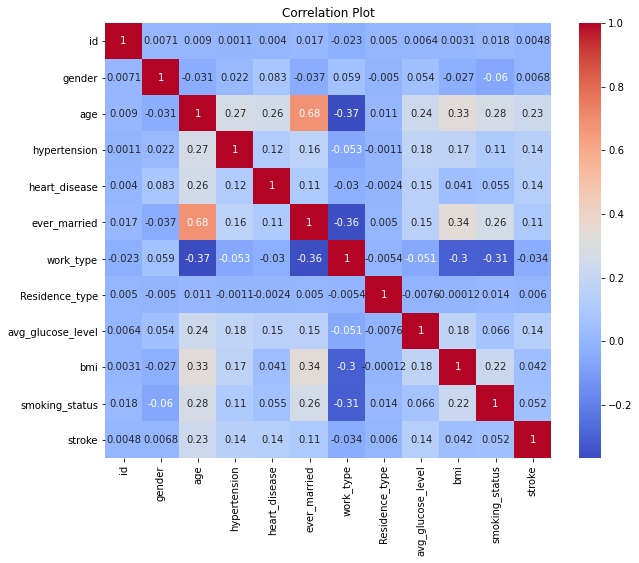

In [37]:
# Visualize correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Plot")
plt.show()

### Solution to Imbalanced Data Problem
We will use the following methods to handle the imbalanced data problem: SMOTE, and . 
- SMOTE is oversampling technique
- Random Undersampling is undersampling technique

#### SMOTE
Synthetic Minority Oversampling Technique (SMOTE) is an oversampling technique that creates synthetic samples from the minority class. It works by selecting examples that are close in the feature space, drawing a line between a randomly chosen pair of examples and drawing a new sample at a point along that line.

<p align="center"><img src="https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/raw/main/Images/SMOTE.png" alt="Synthetic Minority Oversampling Technique (SMOTE)" width="600" height="250">

#### Random Undersampling 
Random undersampling is an undersampling technique that randomly removes observations from the majority class to prevent its signal from dominating the learning algorithm.

<p align="center"><img src="https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/raw/main/Images/random_under_sampling.png" alt="Random Undersampling">

Original Data:
0    4700
1     209
Name: stroke, dtype: int64

SMOTE:
1    4700
0    4700
Name: stroke, dtype: int64

Random Undersampling:
1    209
0    209
Name: stroke, dtype: int64


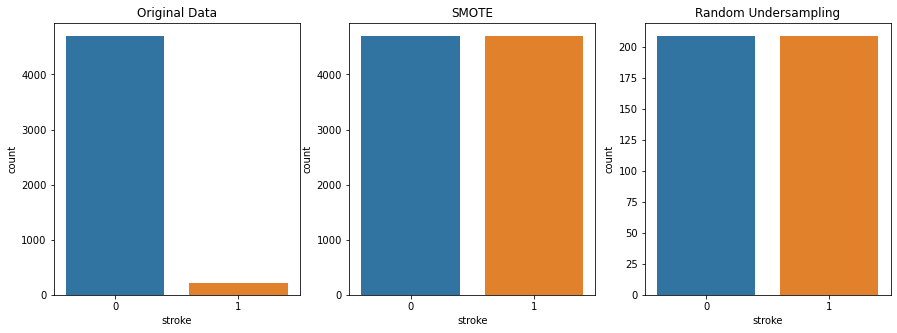

In [38]:
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the class count for the original data
sns.countplot(x=y, ax=axes[0])
axes[0].set_title('Original Data')
print("Original Data:")
print(y.value_counts())

# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Plot the class count for the SMOTE data
sns.countplot(x=y_smote, ax=axes[1])
axes[1].set_title('SMOTE')
print("\nSMOTE:")
print(y_smote.value_counts())

# Apply random undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

# Plot the class count for the random undersampling data
sns.countplot(x=y_rus, ax=axes[2])
axes[2].set_title('Random Undersampling')
print("\nRandom Undersampling:")
print(y_rus.value_counts())

# Show the plot
plt.show()


### Model Building and Evaluation 
We will build multiple machine learning models using GridSearchCV to find the best hyperparameters. We will evaluate the performance of the models using the test set. We will compare the performance of the models and data Preprocessing techniques.

#### Models Used
- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Random Forest

**Dataset used:** Complete data with categorical and numerical features. The Categorical features are encoded using LabelEncoder.

In [40]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers and their parameter grids for GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10],'criterion': ['gini', 'entropy']}
dt = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
lr = LogisticRegression(random_state=42)
lr_params = {'C': [0.1, 1, 10]}
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Define the data techniques
oversampler = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# List to store the results
store_results = []
store_accuracies = []
print("Training and Optimizing Classifiers using complete data with categorical columns encoded")
# Loop through different data techniques
for i, (name, sampler) in enumerate({'Original Data': None, 'SMOTE Data': oversampler, 'Undersampled Data': undersampler}.items()):
    if sampler is not None:
        X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
    else:
        X_train_res, y_train_res = X_train, y_train
    
    # Loop through different classifiers
    for j, (clf_name, clf_params) in enumerate({'Random Forest': (rf, rf_params), 'Decision Tree': (dt, dt_params),
                                                'Logistic Regression': (lr, lr_params), 'KNN': (knn, knn_params)}.items()):
        clf = clf_params[0]
        params = clf_params[1]
        # Perform GridSearchCV with 5-fold cross validation
        grid_clf = GridSearchCV(clf, params, cv=5)
        grid_clf.fit(X_train_res, y_train_res)
        best_clf = grid_clf.best_estimator_
        
        # Make predictions on test data
        y_pred = best_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        
        # Store the results
        store_results.append({'Data Technique': name, 'Classifier': clf_name, 'Best Params': grid_clf.best_params_,
                        'Validation Accuracy': grid_clf.best_score_, 'Test Accuracy': accuracy, 'Classification Report': classification_rep})
        # Store the accuracies only
        store_accuracies.append({'Data Technique': name, 'Classifier': clf_name, 'Validation Accuracy': grid_clf.best_score_, 'Test Accuracy': accuracy})

        print(f"Finished {clf_name} with {name}")
        print('Test Accuracy', accuracy)

# Convert results to dataframe
results_df = pd.DataFrame(store_results)
accuracies_df = pd.DataFrame(store_accuracies)

Training and Optimizing Classifiers using complete data with categorical columns encoded
Finished Random Forest with Original Data
Test Accuracy 0.9460285132382892
Finished Decision Tree with Original Data
Test Accuracy 0.9439918533604889
Finished Logistic Regression with Original Data
Test Accuracy 0.9470468431771895
Finished KNN with Original Data
Test Accuracy 0.9460285132382892
Finished Random Forest with SMOTE Data
Test Accuracy 0.8991853360488798
Finished Decision Tree with SMOTE Data
Test Accuracy 0.8716904276985743
Finished Logistic Regression with SMOTE Data
Test Accuracy 0.7515274949083504
Finished KNN with SMOTE Data
Test Accuracy 0.709775967413442
Finished Random Forest with Undersampled Data
Test Accuracy 0.6863543788187373
Finished Decision Tree with Undersampled Data
Test Accuracy 0.6894093686354379
Finished Logistic Regression with Undersampled Data
Test Accuracy 0.6812627291242362
Finished KNN with Undersampled Data
Test Accuracy 0.48370672097759676


In [43]:
# Print the results
print("Results obtained using complete data with categorical columns encoded")
print(accuracies_df)

Results obtained using complete data with categorical columns encoded
       Data Technique           Classifier  Validation Accuracy  Test Accuracy
0       Original Data        Random Forest             0.960784       0.946029
1       Original Data        Decision Tree             0.956200       0.943992
2       Original Data  Logistic Regression             0.959766       0.947047
3       Original Data                  KNN             0.960275       0.946029
4          SMOTE Data        Random Forest             0.943916       0.899185
5          SMOTE Data        Decision Tree             0.907585       0.871690
6          SMOTE Data  Logistic Regression             0.785602       0.751527
7          SMOTE Data                  KNN             0.800982       0.709776
8   Undersampled Data        Random Forest             0.750230       0.686354
9   Undersampled Data        Decision Tree             0.731080       0.689409
10  Undersampled Data  Logistic Regression             0.7053

#### Visualize the results
The results are visualized using a bar plot to compare the testing accuracy of the models.

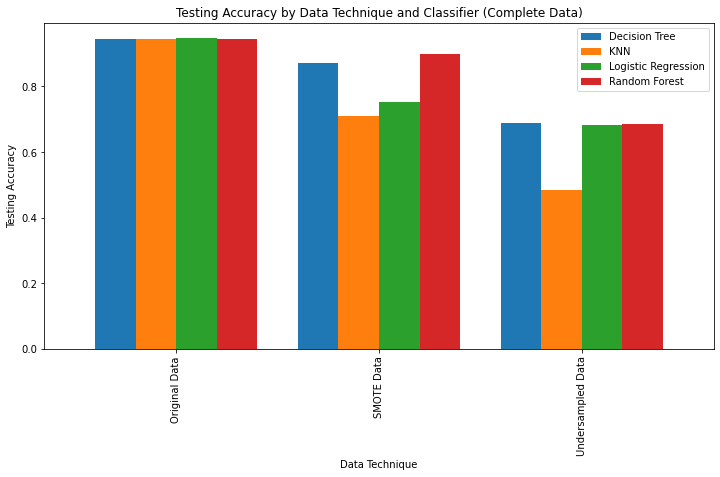

In [44]:
# Group the results by Data Technique and Classifier, and calculate the mean Test Accuracy for each group
grouped_results = accuracies_df.groupby(['Data Technique', 'Classifier']).mean().reset_index()

# Filter the necessary columns for the bar chart
bar_chart_data = grouped_results[['Data Technique', 'Classifier', 'Test Accuracy']]

# Pivot the data to have Data Technique as the index, Classifier as the columns, and Test Accuracy as the values
bar_chart_data = bar_chart_data.pivot(index='Data Technique', columns='Classifier', values='Test Accuracy')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar chart
bar_chart_data.plot(kind='bar', ax=plt.gca(), width=0.8)

# Set the title and labels
plt.title('Testing Accuracy by Data Technique and Classifier (Complete Data)')
plt.xlabel('Data Technique')
plt.ylabel('Testing Accuracy')

# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

#### Model Building and Optimization using the Numerical Data
We will now employ the same approach using the numerical data only. 

In [45]:
# Split the numerical only data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

# Define the classifiers and their parameter grids for GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10],'criterion': ['gini', 'entropy']}
dt = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
lr = LogisticRegression(random_state=42)
lr_params = {'C': [0.1, 1, 10]}
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Define the data techniques
oversampler = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# List to store the results
store_results_num = []
store_accuracies_num = []
from sklearn.impute import SimpleImputer
print("Training and Optimizing Classifiers using numerical data only")
# Loop through different data techniques
for i, (name, sampler) in enumerate({'Original Data': None, 'SMOTE Data': oversampler, 'Undersampled Data': undersampler}.items()):
    if sampler is not None:
        X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
    else:
        X_train_res, y_train_res = X_train, y_train
    
    # Loop through different classifiers
    for j, (clf_name, clf_params) in enumerate({'Random Forest': (rf, rf_params), 'Decision Tree': (dt, dt_params),
                                                'Logistic Regression': (lr, lr_params), 'KNN': (knn, knn_params)}.items()):
        clf = clf_params[0]
        params = clf_params[1]
        # Perform GridSearchCV with 5-fold cross validation
        grid_clf = GridSearchCV(clf, params, cv=5)
        grid_clf.fit(X_train_res, y_train_res)
        best_clf = grid_clf.best_estimator_
        
        # Make predictions on test data
        y_pred = best_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        
        # Store the results
        store_results_num.append({'Data Technique': name, 'Classifier': clf_name, 'Best Params': grid_clf.best_params_,
                        'Validation Accuracy': grid_clf.best_score_, 'Test Accuracy': accuracy, 'Classification Report': classification_rep})
        # Store the accuracies only
        store_accuracies_num.append({'Data Technique': name, 'Classifier': clf_name, 'Validation Accuracy': grid_clf.best_score_, 'Test Accuracy': accuracy})

# Convert results to dataframe
results_df_num = pd.DataFrame(store_results_num)
accuracies_df_num = pd.DataFrame(store_accuracies_num)

Training and Optimizing Classifiers using numerical data only


In [46]:
print("Results obtained using numerical data only")
# Print the results
print(accuracies_df_num)

Results obtained using numerical data only
       Data Technique           Classifier  Validation Accuracy  Test Accuracy
0       Original Data        Random Forest             0.960785       0.946029
1       Original Data        Decision Tree             0.956200       0.943992
2       Original Data  Logistic Regression             0.960275       0.946029
3       Original Data                  KNN             0.959001       0.946029
4          SMOTE Data        Random Forest             0.941792       0.875764
5          SMOTE Data        Decision Tree             0.933707       0.910387
6          SMOTE Data  Logistic Regression             0.774065       0.742363
7          SMOTE Data                  KNN             0.909307       0.815682
8   Undersampled Data        Random Forest             0.750128       0.670061
9   Undersampled Data        Decision Tree             0.740553       0.706721
10  Undersampled Data  Logistic Regression             0.763031       0.714868
11  Under

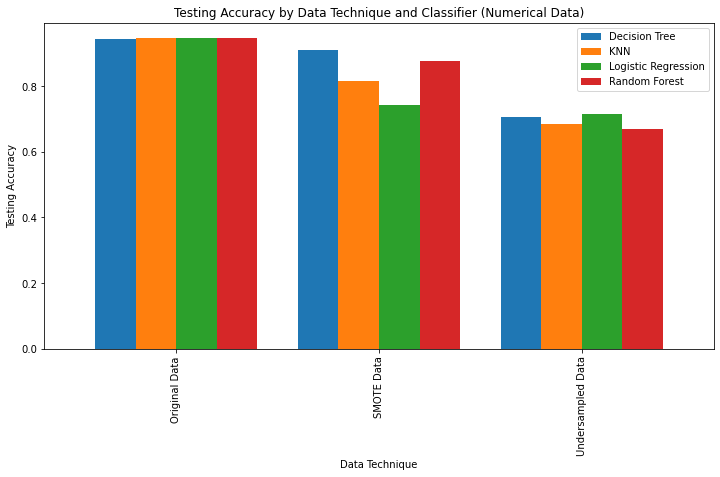

In [47]:
# Group the results by Data Technique and Classifier, and calculate the mean Test Accuracy for each group
grouped_results = accuracies_df_num.groupby(['Data Technique', 'Classifier']).mean().reset_index()

# Filter the necessary columns for the bar chart
bar_chart_data = grouped_results[['Data Technique', 'Classifier', 'Test Accuracy']]

# Pivot the data to have Data Technique as the index, Classifier as the columns, and Test Accuracy as the values
bar_chart_data = bar_chart_data.pivot(index='Data Technique', columns='Classifier', values='Test Accuracy')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar chart
bar_chart_data.plot(kind='bar', ax=plt.gca(), width=0.8)

# Set the title and labels
plt.title('Testing Accuracy by Data Technique and Classifier (Numerical Data)')
plt.xlabel('Data Technique')
plt.ylabel('Testing Accuracy')

# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

### Conclusion
We can see that the models built using the numerical data only perform better than the models built using the complete data. This is because the categorical features are not useful in predicting the target variable. We can also see that the models built using the SMOTE technique perform better than the models built using the Random Undersampling technique. This is because the SMOTE technique creates synthetic samples from the minority class, which results in a better representation of the minority class in the dataset. Random Undersampling randomly removes observations from the majority class, which results in a loss of information.

The following are major takeaways from this notebook:
- The dataset is imbalanced, where the majority class (no stroke) accounts for 95.13% of the observations and the minority class (stroke) accounts for 4.87% of the observations.
- The models built using the numerical data only perform better than the models built using the complete data.
- Models built using actual data perform better than models built using synthetic data but have a higher imbalance.
- The models built using the SMOTE technique perform better than the models built using the Random Undersampling technique. This is because the SMOTE technique creates synthetic samples from the minority class, which results in a better representation of the minority class in the dataset. Random Undersampling randomly removes observations from the majority class, which results in a loss of information. 

Overall, Decision Tree built using numerical data and SMOTE technique is best suited for this problem. As it overcomes the problem of imbalanced data and is also accurate (Testing accuracy = 91%). Random Forest with complete data and SMOTE technique had 89% testing accuracy.
